In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [61]:
class Generator:
    def __init__(self, name, min_price, max_price, capacity):
        self.name = name
        self.min_price = min_price
        self.max_price = max_price
        self.capacity = capacity

    def bid(self):
        price = np.random.uniform(self.min_price, self.max_price)
        quantity = np.random.uniform(0, self.capacity)
        return (self.name, price, quantity)

class Consumer:
    def __init__(self, name, max_price, demand):
        self.name = name
        self.max_price = max_price
        self.demand = demand

    def offer(self):
        price = np.random.uniform(0, self.max_price)
        return (self.name, price, self.demand)

In [63]:
# Create some generators and consumers
generators = [
    Generator('GenA', 20, 50, 100),
    Generator('GenB', 30, 60, 150),
    Generator('GenC', 25, 55, 120)
]

consumers = [
    Consumer('ConsA', 70, 80),
    Consumer('ConsB', 65, 90),
    Consumer('ConsC', 75, 110)
]

# Collect bids from generators
gen_bids = [gen.bid() for gen in generators]
gen_bids_df = pd.DataFrame(gen_bids, columns=['Name', 'Price', 'Quantity'])
gen_bids_df = gen_bids_df.sort_values(by='Price')

# Collect offers from consumers
cons_offers = [cons.offer() for cons in consumers]
cons_offers_df = pd.DataFrame(cons_offers, columns=['Name', 'Price', 'Demand'])
cons_offers_df = cons_offers_df.sort_values(by='Price', ascending=False)

print("Generator Bids:")
print(gen_bids_df)
print("\nConsumer Offers:")
print(cons_offers_df)

Generator Bids:
   Name      Price   Quantity
2  GenC  31.274953  29.096395
0  GenA  45.584679  98.831408
1  GenB  46.257341  26.831682

Consumer Offers:
    Name      Price  Demand
2  ConsC  67.890804     110
1  ConsB  56.658749      90
0  ConsA   5.009225      80


In [65]:
# Function to match bids and offers
def match_bids_offers(gen_bids_df, cons_offers_df):
    market_price = 0
    market_quantity = 0

    for i in range(len(cons_offers_df)):
        for j in range(len(gen_bids_df)):
            if cons_offers_df.iloc[i]['Price'] >= gen_bids_df.iloc[j]['Price']:
                transacted_quantity = min(cons_offers_df.iloc[i]['Demand'], gen_bids_df.iloc[j]['Quantity'])
                market_price = gen_bids_df.iloc[j]['Price']
                market_quantity += transacted_quantity
                gen_bids_df.iloc[j]['Quantity'] -= transacted_quantity
                cons_offers_df.iloc[i]['Demand'] -= transacted_quantity

                if cons_offers_df.iloc[i]['Demand'] == 0:
                    break

    return market_price, market_quantity

market_price, market_quantity = match_bids_offers(gen_bids_df, cons_offers_df)

print(f"\nMarket Clearing Price: {market_price}")
print(f"Market Clearing Quantity: {market_quantity}")


Market Clearing Price: 46.25734137285791
Market Clearing Quantity: 300.68756267715906


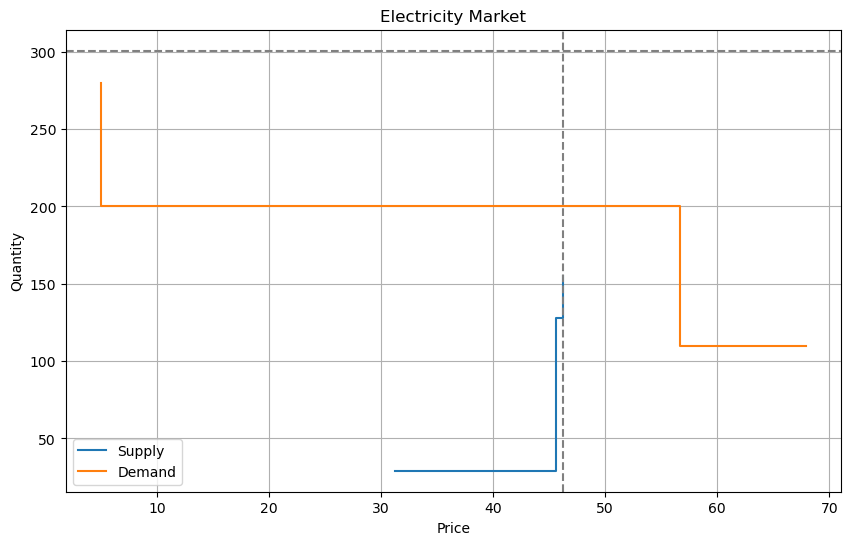

In [67]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.step(gen_bids_df['Price'], gen_bids_df['Quantity'].cumsum(), where='post', label='Supply')
plt.step(cons_offers_df['Price'], cons_offers_df['Demand'].cumsum(), where='post', label='Demand')
plt.axhline(market_quantity, color='gray', linestyle='--')
plt.axvline(market_price, color='gray', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Electricity Market')
plt.legend()
plt.grid(True)
plt.show()